Base de donnéé

In [2]:
# Base de données pour les types de bois avec f_md issu directement des valeurs des tableaux
parametres_bois = {
    "C16": {"f_md": 9.4, "E_0_05": 5400, "E_0_mean": 11000},
    "C24": {"f_md": 14.1, "E_0_05": 7000, "E_0_mean": 11000},
    "C30": {"f_md": 17.6, "E_0_05": 8000, "E_0_mean": 12000},
    "D30": {"f_md": 17.6, "E_0_05": 8000, "E_0_mean": 12000},
    "GL20h": {"f_md": 13.3, "E_0_05": 7000, "E_0_mean": 11000},
    "GL24h": {"f_md": 16.0, "E_0_05": 9100, "E_0_mean": 11500},
    "GL24c": {"f_md": 16.0, "E_0_05": 9100, "E_0_mean": 11500},
    "GL28h": {"f_md": 18.7, "E_0_05": 10500, "E_0_mean": 14200},
    "GL28c": {"f_md": 18.7, "E_0_05": 10500, "E_0_mean": 14200},
    "GL32h": {"f_md": 21.3, "E_0_05": 11200, "E_0_mean": 15400},
    "GL32c": {"f_md": 21.3, "E_0_05": 11200, "E_0_mean": 15400}
}

# Dimensions standard
dimensions_standard = {
    "Bois Massif": [
        (60, [100, 120, 140, 160, 180, 200]),
        (80, [100, 120, 140, 160, 180, 200, 220, 240]),
        (100, [100, 120, 140, 160, 180, 200, 220, 240, 260, 280]),
        (120, [120, 140, 160, 180, 200, 220, 240, 260, 280, 300]),
        (140, [140, 160, 180, 200, 220, 240, 260, 280, 300]),
        (160, [160, 180, 200, 220, 240, 260, 280, 300]),
        (180, [180, 200, 220, 240, 260, 280, 300]),
        (200, [200, 220, 240, 260, 280, 300]),
        (220, [220, 240, 260, 280, 300]),
        (240, [240, 260, 280, 300])
    ],
    "BLC": [
        (100, [120, 160, 200, 240, 280, 320, 360, 400, 440]),
        (120, [160, 200, 240, 280, 320, 360, 400, 440, 480]),
        (140, [200, 240, 280, 320, 360, 400, 440, 480, 520, 560]),
        (160, [240, 280, 320, 360, 400, 440, 480, 520, 560, 600]),
        (180, [280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680]),
        (200, [320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720]),
        (220, [360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760]),
        (240, [400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800]),
        (260, [440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840]),
        (280, [480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880]),
        (300, [520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920]),
        (320, [560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960]),
        (340, [600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000]),
        (360, [640, 680, 720, 760, 800, 840, 880, 920, 960, 1000, 1040]),
        (380, [680, 720, 760, 800, 840, 880, 920, 960, 1000, 1040, 1080]),
        (400, [720, 760, 800, 840, 880, 920, 960, 1000, 1040, 1080, 1120]),
    ]
}

# Flexion mono axiale 

vérification

In [3]:
import math
import pandas as pd
import matplotlib.pyplot as plt


def calcul_flexion_monoaxiale(moment_flechissant_kNm, largeur, hauteur, type_bois, classe_humidite, duree_application, ksys=1.0):
    """
    Calcule la vérification à la flexion monoaxiale avec les paramètres SIA 265 - 4.2.9.

    Arguments :
    - moment_flechissant_kNm : Moment fléchissant My,Ed (kNm)
    - largeur : Largeur de la section (b, mm)
    - hauteur : Hauteur de la section (h, mm)
    - type_bois : Classe du bois (ex: "C24", "GL28h")
    - classe_humidite : Classe d'humidité (1, 2 ou 3)
    - duree_application : Durée d'application de la charge ("infinie", "choc")
    - ksys : Coefficient d'effet système

    Retourne :
    - Vrai si la vérification est respectée, Faux sinon.
    """
    # Convertir le moment en Nmm
    moment_flechissant = moment_flechissant_kNm * 1e6  # Conversion de kNm à Nmm

    # Paramètres du bois
    f_md = parametres_bois[type_bois]["f_md"]  # Valeur de dimensionnement de la résistance à la flexion

    # Facteur modifiant en fonction de la durée d'application de la charge (eta_t)
    eta_t = {"infinie": 1.0, "choc": 1.4}.get(duree_application, 1.0)
    # Facteur modifiant en fonction de la classe d'humidité (eta_w)
    eta_w = {1: 1.0, 2: 0.8, 3: 0.6}.get(classe_humidite, 1.0)

    # Calcul du moment de résistance W_y
    W_y = (largeur * hauteur**2) / 6  # en mm3
    sigma_myd = moment_flechissant / W_y  # Contrainte de flexion en N/mm2

    # Résistance à la flexion corrigée avec les modificateurs eta_t, eta_w et ksys
    f_md_corrigee = f_md * eta_t * eta_w * ksys

    # Vérification de la flexion
    verif = sigma_myd <= f_md_corrigee

    # Affichage des résultats
    print("\n=== Résultats de la Vérification à la Flexion (SIA 265 - 4.2.9) ===")
    print(f"Classe du bois : {type_bois}")
    print(f"Classe d'humidité : {classe_humidite}")
    print(f"Durée d'application : {duree_application}")
    print(f"Coefficient d'effet système (k_sys) : {ksys}")
    print(f"Moment fléchissant (My,Ed) : {moment_flechissant_kNm:.2f} kNm")
    print(f"Largeur de la section : {largeur} mm")
    print(f"Hauteur de la section : {hauteur} mm")
    print(f"W_y (Module de résistance) : {W_y:.2f} mm3")
    print(f"Contrainte de flexion (sigma_myd) : {sigma_myd:.2f} N/mm2")
    print(f"Résistance corrigée (f_md) : {f_md_corrigee:.2f} N/mm2")
    print(f"Vérification respectée : {'OUI' if verif else 'NON'}")

    return verif

# Exemple d'utilisation
type_bois = 'C24'
moment_flechissant = 7.06 # kNm
largeur = 120  # Largeur de la section en mm
hauteur = 240  # Hauteur de la section en mm
classe_humidite = 1  # Classe 1
duree_application = "infinie"  # Durée d'application de la charge
ksys = 1.0  # Coefficient d'effet système

# Calcul
resultat = calcul_flexion_monoaxiale(moment_flechissant, largeur, hauteur, type_bois, classe_humidite, duree_application, ksys)

if resultat:
    print("\nLa section respecte la vérification à la flexion.")
else:
    print("\nATTENTION : La section ne respecte PAS la vérification à la flexion.")



=== Résultats de la Vérification à la Flexion (SIA 265 - 4.2.9) ===
Classe du bois : C24
Classe d'humidité : 1
Durée d'application : infinie
Coefficient d'effet système (k_sys) : 1.0
Moment fléchissant (My,Ed) : 7.06 kNm
Largeur de la section : 120 mm
Hauteur de la section : 240 mm
W_y (Module de résistance) : 1152000.00 mm3
Contrainte de flexion (sigma_myd) : 6.13 N/mm2
Résistance corrigée (f_md) : 14.10 N/mm2
Vérification respectée : OUI

La section respecte la vérification à la flexion.


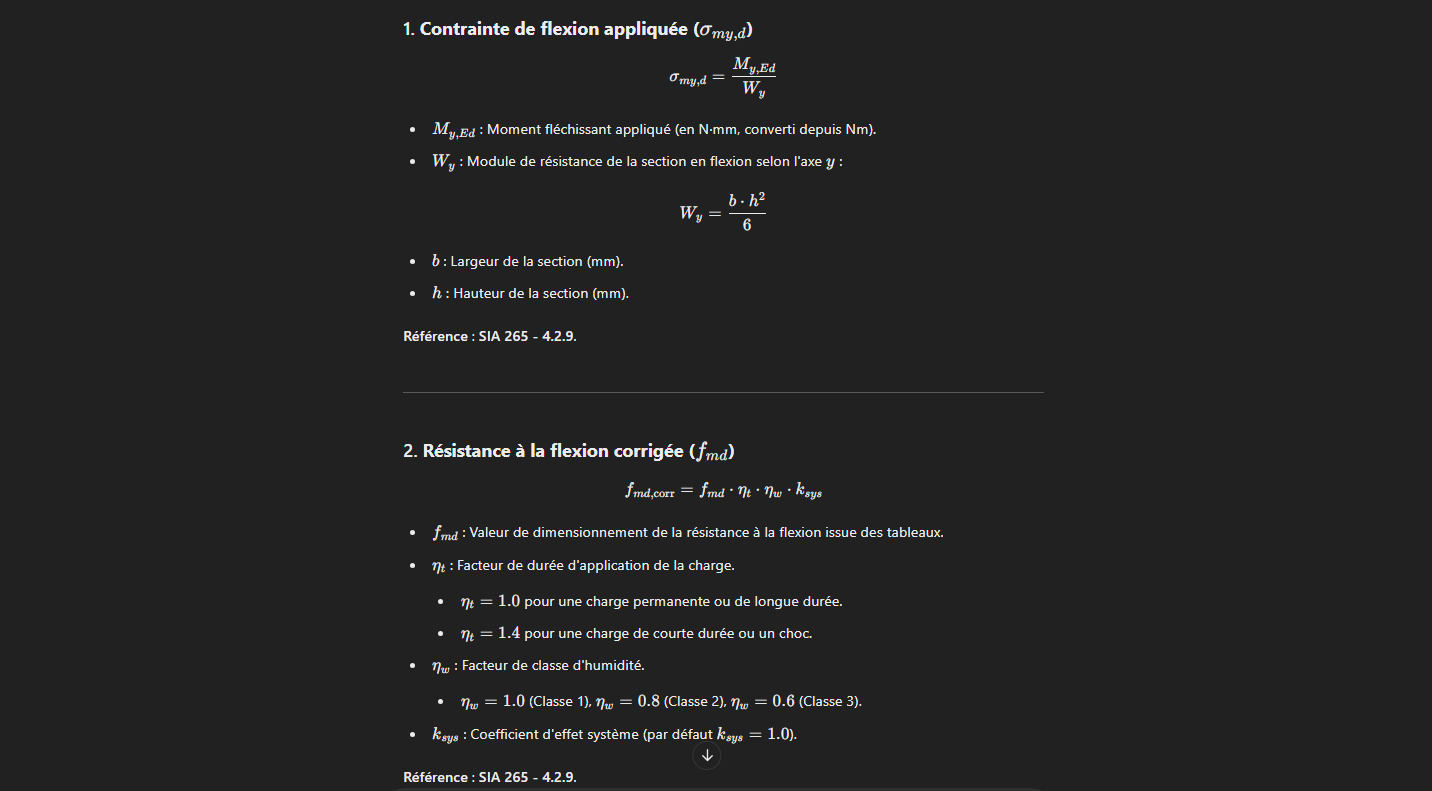
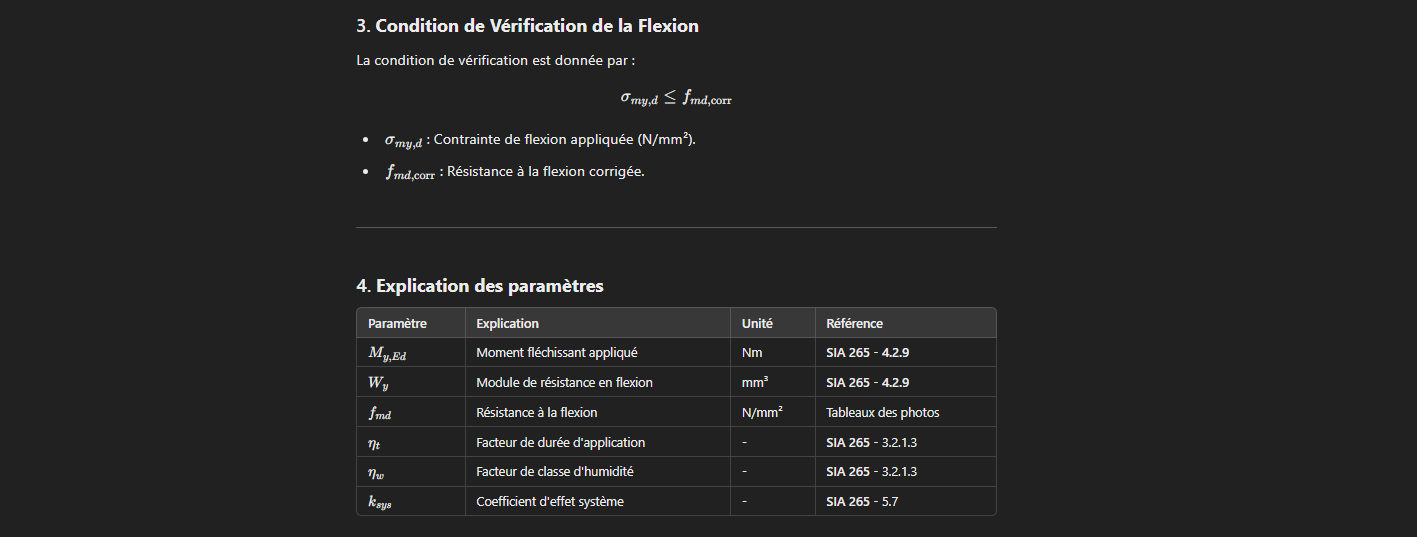
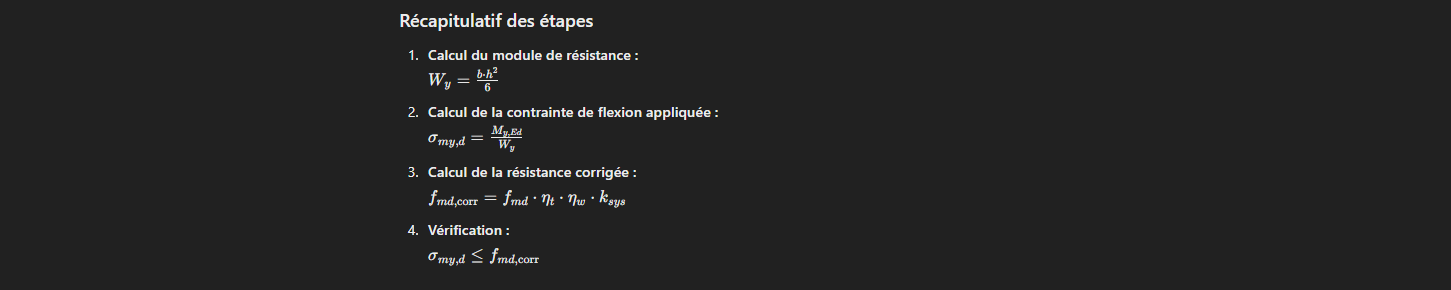

# Hauteur min avec b fixe 

In [ ]:
import math
import pandas as pd

# Fonction pour calculer la hauteur minimale
def hauteur_minimale(moment_flechissant_kNm, largeur, type_bois, classe_humidite, duree_application, ksys=1.0):
    """
    Calcule la hauteur minimale de la section pour respecter la vérification à la flexion monoaxiale.
    """
    moment_flechissant = moment_flechissant_kNm * 1e6  # Conversion de kNm à Nmm
    f_md = parametres_bois[type_bois]["f_md"]
    eta_t = {"infinie": 1.0, "choc": 1.4}.get(duree_application, 1.0)
    eta_w = {1: 1.0, 2: 0.8, 3: 0.6}.get(classe_humidite, 1.0)
    f_md_corrigee = f_md * eta_t * eta_w * ksys
    h_min = math.sqrt((6 * moment_flechissant) / (f_md_corrigee * largeur))
    return math.ceil(h_min)

# Fonction pour trouver la section standard minimale
def verifier_sections_standard(moment_flechissant_kNm, type_bois, classe_humidite, duree_application, ksys=1.0):
    """
    Trouve les sections standard minimales respectant la vérification à la flexion monoaxiale.
    """
    moment_flechissant = moment_flechissant_kNm * 1e6  # Conversion de kNm à Nmm
    for _, dimensions in dimensions_standard.items():
        for largeur, hauteurs in dimensions:
            for hauteur in hauteurs:
                h_min_calculee = math.sqrt((6 * moment_flechissant) / (parametres_bois[type_bois]['f_md'] * largeur * ksys))
                if hauteur >= h_min_calculee:
                    return largeur, hauteur
    return None, None

moment_flechissant = 7.06  # kNm
type_bois = "GL24h"
largeur = 200  # mm (fixe pour le calcul de la hauteur minimale)
classe_humidite = 1
duree_application = "infinie"
ksys = 1.0

# Calcul de la hauteur minimale
hauteur_min_calculee = hauteur_minimale(moment_flechissant, largeur, type_bois, classe_humidite, duree_application, ksys)

# Recherche de la section standard
largeur_std, hauteur_std = verifier_sections_standard(moment_flechissant, type_bois, classe_humidite, duree_application, ksys)

# Résultats
results = {
    "Hauteur minimale calculée": hauteur_min_calculee,
    "Largeur section standard": largeur_std,
    "Hauteur section standard": hauteur_std,
    "Taux d'utilisation": round((hauteur_min_calculee / hauteur_std) * 100, 2) if hauteur_std else None
}

# Affichage des résultats avec mise en évidence
df_results = pd.DataFrame([results])
print("\n=== Résultats Mis en Évidence ===")
print(df_results.to_string(index=False))
display(df_results)



=== Résultats Mis en Évidence ===
 Hauteur minimale calculée  Largeur section standard  Hauteur section standard  Taux d'utilisation
                       456                       140                       560               81.43


,Hauteur minimale calculée,Largeur section standard,Hauteur section standard,Taux d'utilisation
0,456,140,560,81.43


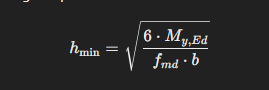

# Sections minimum standars 


=== Tableau des sections minimales par type de bois avec contraintes ===


,Type de bois,Largeur (mm),Hauteur (mm),Contrainte exercée (N/mm²),Contrainte max (N/mm²),Taux d'utilisation (%)
0,C16,160,560,8.358578,9.4,88.921040
1,C24,140,480,13.002232,14.1,92.214412
2,C30,120,480,15.169271,17.6,86.189039
3,D30,120,480,15.169271,17.6,86.189039
4,GL20h,140,480,13.002232,13.3,97.761144
5,GL24h,120,480,15.169271,16.0,94.807943
6,GL24c,120,480,15.169271,16.0,94.807943
7,GL28h,120,440,18.052686,18.7,96.538428
8,GL28c,120,440,18.052686,18.7,96.538428
9,GL32h,220,300,21.181818,21.3,99.445156


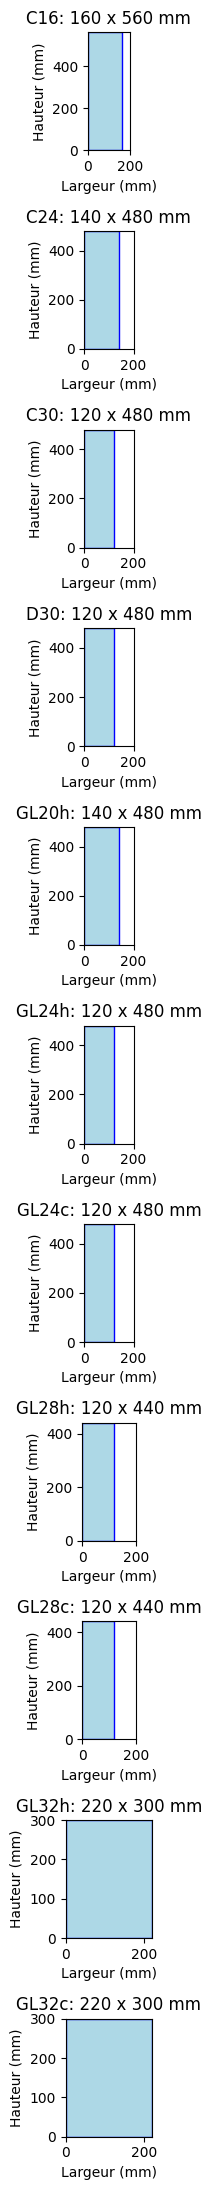

In [5]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def verifier_sections_standard(moment_flechissant_kNm, type_bois, classe_humidite, duree_application, ksys=1.0):
    """
    Trouve les sections standard minimales respectant la vérification à la flexion monoaxiale.
    """
    moment_flechissant = moment_flechissant_kNm * 1e6  # Conversion de kNm à Nmm

    for categorie, dimensions in dimensions_standard.items():
        for largeur, hauteurs in dimensions:
            for hauteur in hauteurs:
                h_min_calculee = math.sqrt((6 * moment_flechissant) / (parametres_bois[type_bois]['f_md'] * largeur * ksys))
                if hauteur >= h_min_calculee:
                    contrainte_exercee = moment_flechissant / ((largeur * hauteur**2) / 6)
                    taux_utilisation = contrainte_exercee / parametres_bois[type_bois]['f_md'] * 100
                    return largeur, hauteur, contrainte_exercee, parametres_bois[type_bois]['f_md'], taux_utilisation
    return None, None, None, None, None

# Calculer les sections minimales pour chaque type de bois
moment_flechissant = 69.9  # kNm
classe_humidite = 1  # Classe 1
duree_application = "infinie"  # Durée d'application de la charge
ksys = 1.0  # Coefficient d'effet système

results = []
for type_bois in parametres_bois.keys():
    largeur, hauteur, contrainte_exercee, contrainte_max, taux_utilisation = verifier_sections_standard(
        moment_flechissant, type_bois, classe_humidite, duree_application, ksys
    )
    results.append({
        "Type de bois": type_bois,
        "Largeur (mm)": largeur,
        "Hauteur (mm)": hauteur,
        "Contrainte exercée (N/mm²)": contrainte_exercee,
        "Contrainte max (N/mm²)": contrainte_max,
        "Taux d'utilisation (%)": taux_utilisation,
    })

# Convertir les résultats en DataFrame pour un affichage clair
results_df = pd.DataFrame(results)

# Affichage propre
from IPython.display import display
print("\n=== Tableau des sections minimales par type de bois avec contraintes ===")
display(results_df)

# Génération des dessins des sections
fig, axes = plt.subplots(len(results), 1, figsize=(6, len(results) * 2))
if len(results) == 1:
    axes = [axes]  # Assure que axes est toujours une liste
for ax, result in zip(axes, results):
    largeur = result["Largeur (mm)"]
    hauteur = result["Hauteur (mm)"]
    type_bois = result["Type de bois"]

    # Dessiner la section
    ax.add_patch(plt.Rectangle((0, 0), largeur, hauteur, edgecolor="blue", facecolor="lightblue"))
    ax.set_xlim(0, max(largeur, 200))
    ax.set_ylim(0, max(hauteur, 200))
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"{type_bois}: {largeur} x {hauteur} mm")
    ax.set_xlabel("Largeur (mm)")
    ax.set_ylabel("Hauteur (mm)")

plt.tight_layout()
plt.show()


SOURCE :
 Dimensionement des structure en bois (aide a l'utilisation des normes SIA 260, 261 et 265)- Pierre André Dupraz - HEPIA 2023


 Lignum



 SIA 265

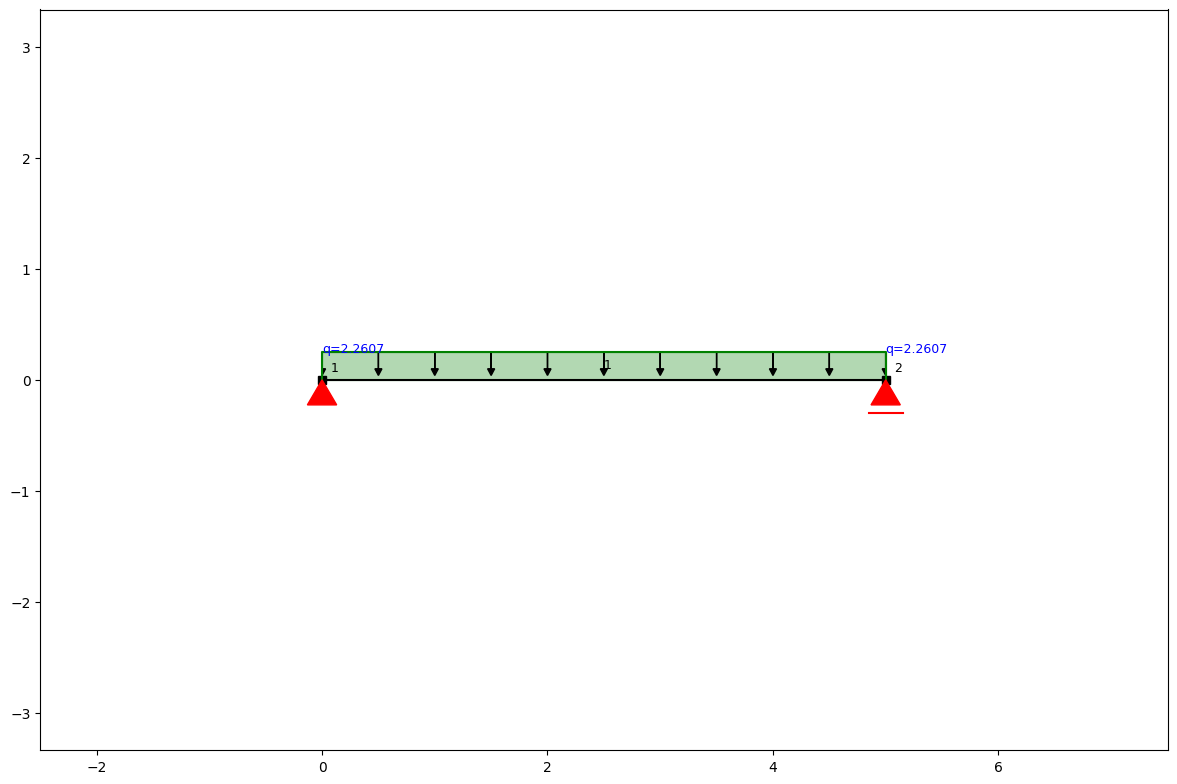

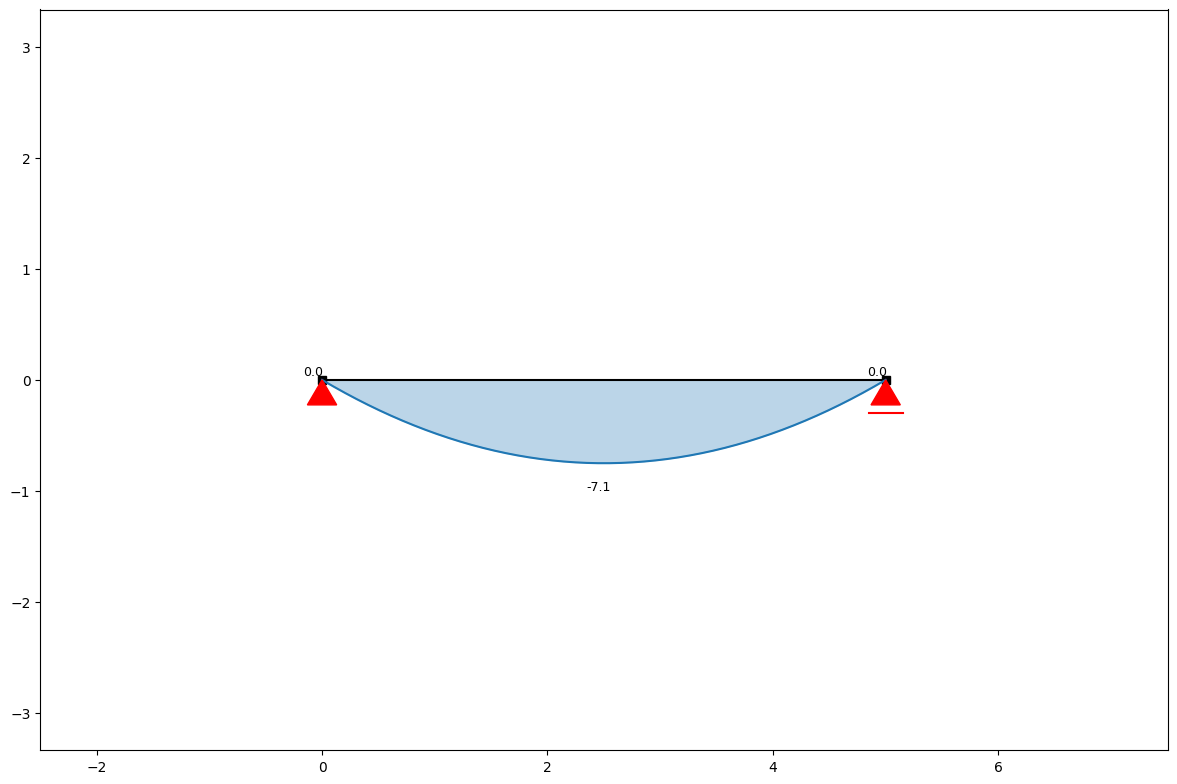

Aucun moment fléchissant trouvé.


In [6]:
from anastruct import SystemElements
import matplotlib.pyplot as plt

def calcul_moment_max(longueur, entraxe, ed):
    # Création du système
    ss = SystemElements()

    # Ajout de la poutre complète
    ss.add_element(location=[[0, 0], [longueur, 0]])

    # Ajout des appuis
    ss.add_support_hinged(1)  # Appui simple au début
    ss.add_support_roll(2)  # Appui simple à la fin

    # Calcul de la charge linéaire répartie qEd
    qEd = ed * entraxe  # Charge linéaire répartie

    # Application de la charge linéaire sur toute la poutre
    ss.q_load(q=-qEd, element_id=[1])

    # Calcul et affichage du système
    ss.solve()
    ss.show_structure()
    ss.show_bending_moment()

    # Extraction du moment fléchissant maximal
    results = ss.get_element_results()
    moments = [abs(result['M']) for result in results if result['M'] is not None]
    
    if moments:
        moment_max = max(moments)
        print(f"Le moment fléchissant maximal est : {moment_max:.2f} kNm")
        return moment_max
    else:
        print("Aucun moment fléchissant trouvé.")
        return 0

# ======= Entrée des valeurs =======
longueur_poutre = 5  # Longueur de la poutre en mètres
entraxe = 0.611  # Entraxe en mètres
Ed = 3.7  # Charge surfacique de dimensionnement en kN/m²
# ==================================

moment_max = calcul_moment_max(longueur_poutre, entraxe, Ed)
